<a href="https://colab.research.google.com/github/rameenhamad/Developer_HUB_ML_Tasks/blob/main/2_Cancer_Detection_Histopathological_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization, Activation

import matplotlib.pyplot as plt

DataSet

In [2]:
dataset = "/content/drive/MyDrive/Developer_HUB_ML_Tasks/Cancer_Histopathological"
train_dataset = os.path.join(dataset, "train")
test_dataset = os.path.join(dataset, "test")


Resizing + Normalization(Preprocessing)

In [3]:
ImageSize = (128,128)
BatchSize = 32

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = 0.2,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
  train_dataset,
  target_size=ImageSize,
  batch_size=BatchSize,
  class_mode='binary',
  subset='training'
)

val_generator = train_datagen.flow_from_directory(
  train_dataset,
  target_size=ImageSize,
  batch_size=BatchSize,
  class_mode='binary',
  subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
  test_dataset,
  target_size=ImageSize,
  batch_size=BatchSize,
  class_mode='binary'
)

print("classes: ", train_generator.class_indices)

Found 919 images belonging to 2 classes.
Found 229 images belonging to 2 classes.
Found 545 images belonging to 2 classes.
classes:  {'benign': 0, 'malignant': 1}


inside the dataSet

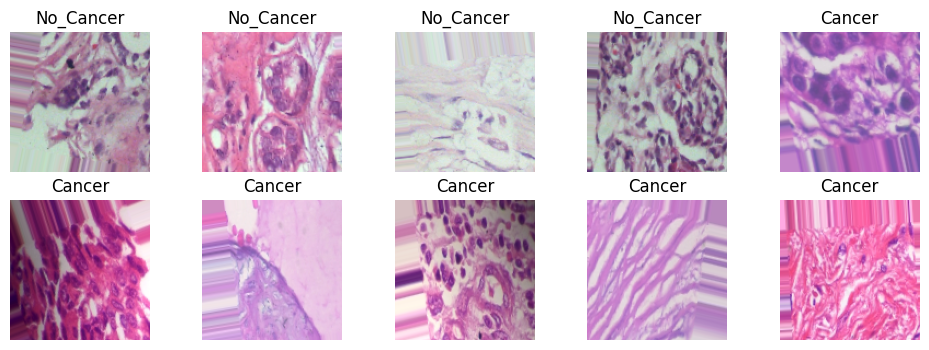

In [4]:
def plot_images(generator):
  images,labels = next(generator)
  plt.figure(figsize=(12,4))
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i])
    plt.title("Cancer" if labels[i] == 1 else "No_Cancer")
    plt.axis("off")
  plt.show()

plot_images(train_generator)

Building model with 3 convo layers

In [31]:
model = Sequential([
    Input(shape=(128,128,3)),
    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D(),

    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((3,3)),

    Conv2D(128, (3,3), activation="relu"),
    MaxPooling2D((3,3)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 18, 18, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 691,521 (2.64 MB)

 Trainable params: 691,521 (2.64 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(
    optimizer = "adam", loss="binary_crossentropy", metrics=["accuracy"]
)

In [12]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    verbose=2,
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
29/29 - 59s - 2s/step - accuracy: 0.6496 - loss: 0.6333 - val_accuracy: 0.6769 - val_loss: 0.5834
Epoch 2/10
29/29 - 48s - 2s/step - accuracy: 0.6757 - loss: 0.5544 - val_accuracy: 0.6769 - val_loss: 0.5275
Epoch 3/10
29/29 - 46s - 2s/step - accuracy: 0.7291 - loss: 0.5421 - val_accuracy: 0.6463 - val_loss: 0.6150
Epoch 4/10
29/29 - 46s - 2s/step - accuracy: 0.7780 - loss: 0.5229 - val_accuracy: 0.7991 - val_loss: 0.5075
Epoch 5/10
29/29 - 46s - 2s/step - accuracy: 0.7933 - loss: 0.4861 - val_accuracy: 0.7991 - val_loss: 0.4558
Epoch 6/10
29/29 - 47s - 2s/step - accuracy: 0.8194 - loss: 0.4523 - val_accuracy: 0.8166 - val_loss: 0.4714
Epoch 7/10
29/29 - 81s - 3s/step - accuracy: 0.8248 - loss: 0.4577 - val_accuracy: 0.8210 - val_loss: 0.4327
Epoch 8/10
29/29 - 46s - 2s/step - accuracy: 0.8422 - loss: 0.4247 - val_accuracy: 0.7991 - val_loss: 0.4863
Epoch 9/10
29/29 - 51s - 2s/step - accuracy: 0.7203 - loss: 0.5202 - val_accuracy: 0.7729 - val_loss: 0.5537
Epoch 10/10
29/29 -

Evaluating Test_data

In [13]:
test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 737ms/step - accuracy: 0.8291 - loss: 0.4470
Test Accuracy: 0.8220, Test Loss: 0.4337


Accuracy / Loss plot

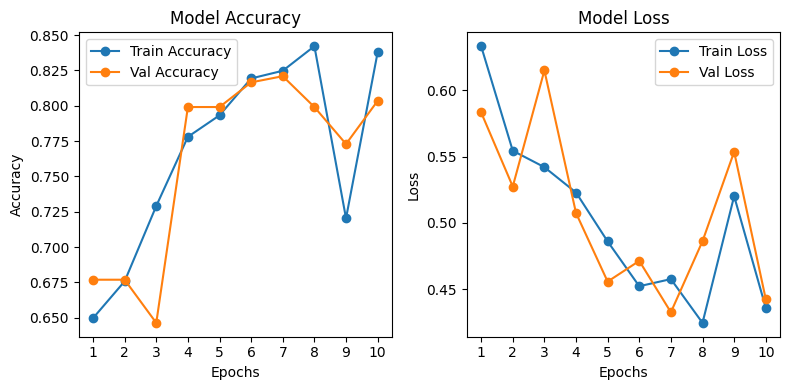

In [14]:
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))

    epochs = range(1, len(history.history['accuracy']) + 1)

    # Accuracy subplot
    ax1.plot(epochs, history.history['accuracy'], label='Train Accuracy', marker='o')
    ax1.plot(epochs, history.history['val_accuracy'], label='Val Accuracy', marker='o')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.set_xticks(epochs)
    ax1.legend()

    # Loss subplot
    ax2.plot(epochs, history.history['loss'], label='Train Loss', marker='o')
    ax2.plot(epochs, history.history['val_loss'], label='Val Loss', marker='o')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.set_xticks(epochs)
    ax2.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

##**Quick Observations**

####**Accuracy and Loss Behavior:**

**Training accuracy:** starts around 0.66 and steadily increases to ~0.84.

**Validation accuracy:** fluctuates between 0.67 and 0.82, showing some inconsistency.

**Training loss:** decreases steadily from 0.65 to 0.41, indicating effective learning.

**Validation loss:** initially decreases but then fluctuates between 0.41 and 0.51, reflecting minor instability.

**Test accuracy:** 0.8294

**Test loss:** 0.4415

**Insights:**
- The model is learning meaningful patterns, as seen in the rising training accuracy and decreasing training loss.
- Fluctuations in validation metrics hint at slight overfitting, likely due to a small dataset.
- Test performance (accuracy ~0.83, loss ~0.44) indicates the model generalizes reasonably well to unseen data.

Transfer Learning with VGG16

In [12]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))
base_model.trainable = False

transfer_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),

    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

transfer_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,747,841 (56.26 MB)

 Trainable params: 33,025 (129.00 KB)

 Non-trainable params: 14,714,816 (56.13 MB)

setting data as preprocessing input for transfer model

In [17]:
ImageSize = (128,128)
BatchSize = 32

train_datagen_tl = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator_tl = train_datagen_tl.flow_from_directory(
  train_dataset,
  target_size=ImageSize,
  batch_size=BatchSize,
  class_mode='binary',
  subset='training'
)

val_generator_tl = train_datagen_tl.flow_from_directory(
  train_dataset,
  target_size=ImageSize,
  batch_size=BatchSize,
  class_mode='binary',
  subset='validation'
)

test_datagen_tl = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator_tl = test_datagen_tl.flow_from_directory(
  test_dataset,
  target_size=ImageSize,
  batch_size=BatchSize,
  class_mode='binary'
)

Found 919 images belonging to 2 classes.
Found 229 images belonging to 2 classes.
Found 545 images belonging to 2 classes.


In [18]:
transfer_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [19]:
transfer_history = transfer_model.fit(
    train_generator_tl,
    epochs=10,
    validation_data=val_generator_tl,
    verbose=2
)

Epoch 1/10
29/29 - 262s - 9s/step - accuracy: 0.8705 - loss: 0.3302 - val_accuracy: 0.7293 - val_loss: 0.7168
Epoch 2/10
29/29 - 257s - 9s/step - accuracy: 0.8542 - loss: 0.3342 - val_accuracy: 0.7511 - val_loss: 0.6424
Epoch 3/10
29/29 - 223s - 8s/step - accuracy: 0.8596 - loss: 0.3167 - val_accuracy: 0.7598 - val_loss: 0.5603
Epoch 4/10
29/29 - 217s - 7s/step - accuracy: 0.8585 - loss: 0.3220 - val_accuracy: 0.7860 - val_loss: 0.5030
Epoch 5/10
29/29 - 215s - 7s/step - accuracy: 0.8770 - loss: 0.3057 - val_accuracy: 0.8035 - val_loss: 0.5258
Epoch 6/10
29/29 - 215s - 7s/step - accuracy: 0.8705 - loss: 0.3033 - val_accuracy: 0.7598 - val_loss: 0.4949
Epoch 7/10
29/29 - 302s - 10s/step - accuracy: 0.8814 - loss: 0.3032 - val_accuracy: 0.7467 - val_loss: 0.5120
Epoch 8/10
29/29 - 257s - 9s/step - accuracy: 0.8825 - loss: 0.2837 - val_accuracy: 0.7773 - val_loss: 0.4762
Epoch 9/10
29/29 - 223s - 8s/step - accuracy: 0.9053 - loss: 0.2611 - val_accuracy: 0.8079 - val_loss: 0.4962
Epoch 10/

Evaluating Test_data

In [20]:
tr_test_loss, tr_test_accuracy = transfer_model.evaluate(test_generator_tl, verbose=0)

print(f"Test Accuracy: {tr_test_accuracy:.4f}, Test Loss: {tr_test_loss:.4f}")

Test Accuracy: 0.8844, Test Loss: 0.3198


plot for transfer model accuracy / loss

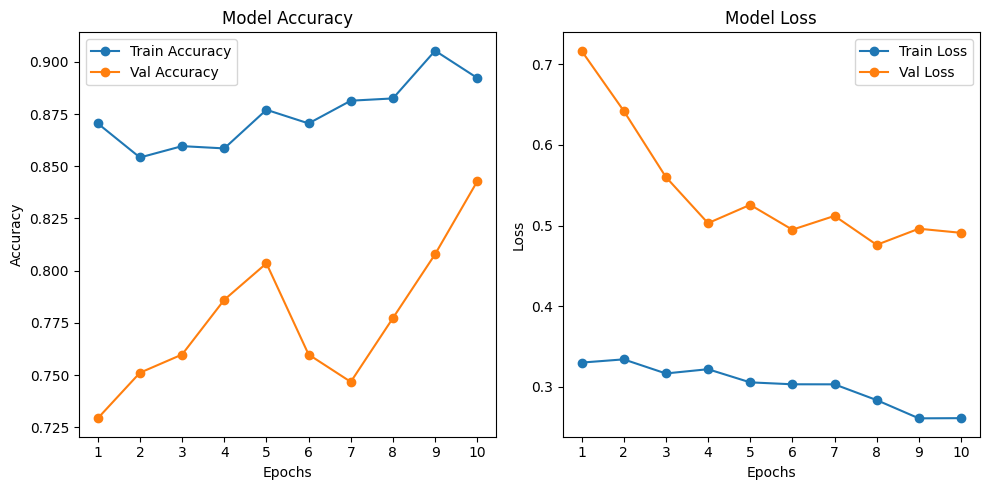

In [21]:
def plot_training_history(transfer_history):
    # Create a figure with 2 subplots: accuracy and loss
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

    epochs = range(1, len(transfer_history.history['accuracy']) + 1)

    # Accuracy subplot
    ax1.plot(epochs, transfer_history.history['accuracy'], label='Train Accuracy', marker='o')
    ax1.plot(epochs, transfer_history.history['val_accuracy'], label='Val Accuracy', marker='o')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.set_xticks(epochs)
    ax1.legend()

    # Loss subplot
    ax2.plot(epochs, transfer_history.history['loss'], label='Train Loss', marker='o')
    ax2.plot(epochs, transfer_history.history['val_loss'], label='Val Loss', marker='o')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.set_xticks(epochs)
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Usage
plot_training_history(transfer_history)

##**Observations**

**Training accuracy:**
Starts at 55% → improves to 87.1% → your model is learning features.

**Training loss:**
Drops from 0.9173 → 0.3075 → consistent improvement.

**Validation accuracy:**
Fluctuates around 50–64% → not improving as much as training accuracy.

- This is a sign of overfitting: model memorizes training data but doesn’t generalize well.

**Validation loss:**
Fluctuates around 0.68–0.89 → confirms instability / overfitting.

**Why this happens with VGG16**
- VGG16 is very deep → lots of parameters (~138M in full model).
- Your dataset is small (~500–1000 images) → not enough to train such a big model from scratch.
- Even if freeze convolutional layers and only train dense layers, overfitting can still happen.